In [6]:
import numpy as np
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import colorcet
import matplotlib as mpl
import imageio.v3 as iio

import warnings
warnings.filterwarnings('ignore')   

plt.style.use('paper.mplstyle')

In [7]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

file_hstcat = '%s/data_hstha_nebulae_catalogue/ngc4303/catalogue/ngc4303_mask.fits' %root_dir 
file_muscat = '%s/data_hstha/ngc4303/muse/NGC4303_nebmask.fits' %root_dir 

# Roated the JWST image to match the orientation of the MUSE and HST images
# sips -r -23.2 STScI-01HNGAK2FGG6ZFCQ6B481D539N.png -o jwst_hst_rotated.png
# file_jwst_png = '%s/data_hstha/ngc4303/rgb/STScI-01HNGAK2FGG6ZFCQ6B481D539N.png' %root_dir
file_jwst_png = '%s/data_hstha/ngc4303/rgb/jwst_hst_rotated.png' %root_dir

file_jwst = '%s/data_hstha/ngc4303/jwst/ngc4303_nircam_lv3_f300m_i2d_anchor.fits' %root_dir 

hdu_hstcat = fits.open(file_hstcat)[0]
hdu_muscat = fits.open(file_muscat)[0]
hdu_jwst = fits.open(file_jwst)[1]

In [8]:
data_png = iio.imread(file_jwst_png)
data_png = data_png[:,:,2]
data_png = data_png[::-1]

data_jwst = hdu_jwst.data.copy()
hdr_jwst = hdu_jwst.header.copy()

print('Shape jwst %i %i' %data_jwst.shape)
print('Shape png %i %i' %data_png.shape)

print('CRVALS %f %f' %(hdr_jwst['CRVAL1'], hdr_jwst['CRVAL2']))
print('CRPIX %f %f' %(hdr_jwst['CRPIX1'], hdr_jwst['CRPIX2']))

crpix1 = (data_png.shape[1]/2)+590
crpix2 = (data_png.shape[0]/2)+240

hdr_jwst['CRPIX1'] = crpix1
hdr_jwst['CRPIX2'] = crpix2

hdu_hwst_new = fits.PrimaryHDU(data=data_png, header=hdr_jwst)
hdu_hwst_new.writeto('%s/data_hstha/ngc4303/jwst/tmp.fits' %root_dir, overwrite=True)

Shape jwst 3573 4554
Shape png 2502 2222
CRVALS 185.477893 4.474952
CRPIX 2277.914773 1787.556469


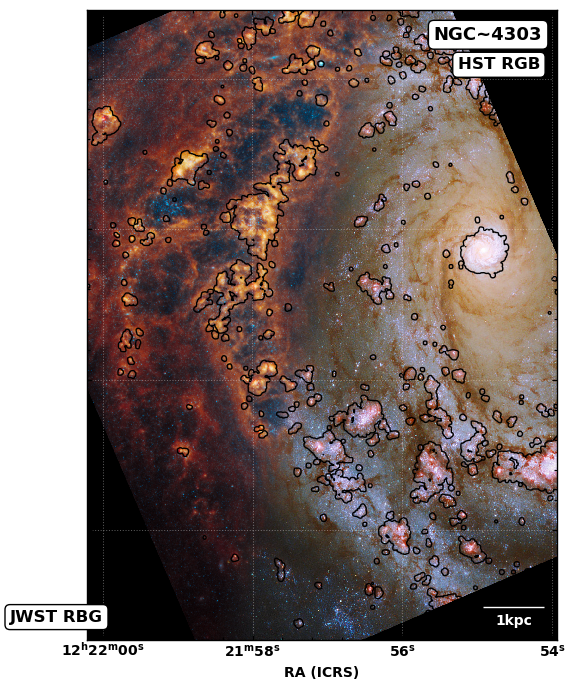

In [16]:
# # Define the region
l = 185.4878252
b = 4.4696837
width = 0.0186172 * 1.4
height = 0.0249682 * 1.4

# Plot the maps
fig = plt.figure(figsize=(7, 7)) 

ax1 = aplpy.FITSFigure(hdu_hwst_new, figure=fig, subplot=(1,1,1))
ax1.show_rgb(file_jwst_png)

ax1.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)

for ax in [ax1]:

    # hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
    # ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    # hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
    # ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    ax.recenter(l, b, width=width, height=height)

ax1.axis_labels.hide_y()
ax1.tick_labels.hide_y()

ax1.add_label(1-0.03, 0.975, r'NGC~4303', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=13, ha='right', va='top', zorder=15)
ax1.add_label(1-0.035, 0.975-0.05, 'HST RGB', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12, ha='right', va='top')
ax1.add_label(0.035, 0.025, 'JWST RBG', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12, ha='right', va='bottom')

ax1.set_nan_color('lightgrey')
ax1.ticks.set_color('black')
ax1.add_scalebar(1000/(17e6/206265)*u.arcsec, corner='bottom right', color='white')
ax1.scalebar.set_label('1kpc')

for i, ax in enumerate(fig.get_axes()):

    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.35, ls=':', color='white')
    axes[i].set_facecolor('lightgrey')

fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./figs/maps_hstmuse_ngc4303_masks_jwsthst.pdf', dpi=150, bbox_inches='tight', transparent=True)